# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = Path ('Images')

# Classes creation

In [4]:
classes = ['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ','ঁ','০','১','২','৩','৪','৫','৬','৭','৮','৯','ক্ষ','ব্দ','ঙ্গ','ঙ্ক','স্ফ','স্থ','চ্ছ','ক্ত','স্ন','ষ্ণ','ম্প','হ্ম','প্ত','ম্ব','ন্ড','দ্ভ','ত্থ','ষ্ঠ','ল্প','ষ্প','ন্দ','ন্ধ','ম্ম','ণ্ঠ']

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

অ
আ
ই
ঈ
উ
ঊ
ঋ
এ
ঐ
ও
ঔ
ক
খ
গ
ঘ
ঙ
চ
ছ
জ
ঝ
ঞ
ট
ঠ
ড
ঢ
ণ
ত
থ
দ
ধ
ন
প
ফ
ব
ভ
ম
য
র
ল
শ
ষ
স
হ
ড়
ঢ়
য়
ৎ
ং
ঃ
ঁ
০
১
২
৩
৪
৫
৬
৭
৮
৯
ক্ষ
ব্দ
ঙ্গ
ঙ্ক
স্ফ
স্থ
চ্ছ
ক্ত
স্ন
ষ্ণ
ম্প
হ্ম
প্ত
ম্ব
ন্ড
দ্ভ
ত্থ
ষ্ঠ
ল্প
ষ্প
ন্দ
ন্ধ
ম্ম
ণ্ঠ


# Databunch creation

In [6]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

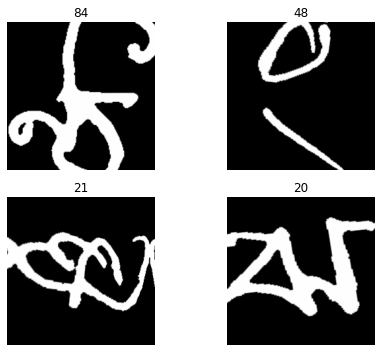

In [24]:
data.show_batch(rows=2, figsize=(7,5))

# ResNet CNN Model

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=(error_rate, accuracy))

In [8]:
learn.unfreeze()

### Learning rate finding

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


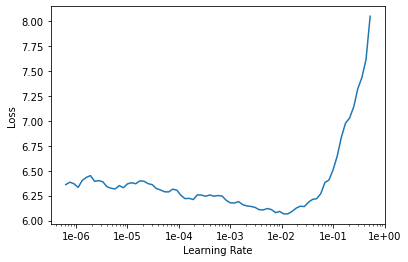

In [10]:
learn.recorder.plot()

### Training

In [11]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.966797,0.607674,0.169170,0.830830,26:44
1,0.717531,0.494175,0.119954,0.880046,22:22
2,0.437319,0.328150,0.084976,0.915024,12:45
3,0.329752,0.234437,0.060504,0.939496,12:39
4,0.284639,0.212575,0.055146,0.944854,12:21


In [12]:
learn.save ('stage-1-apr16')

### Model export

In [13]:
learn.export()

# Interpretation

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

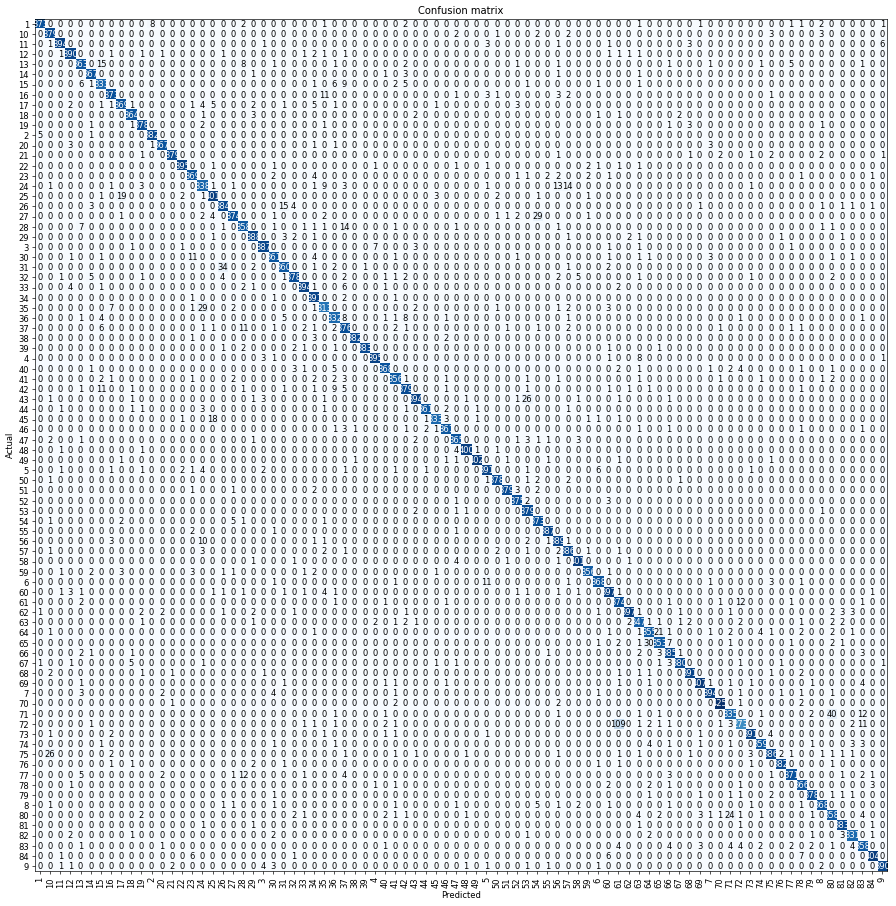

In [17]:
interp.plot_confusion_matrix(figsize=(15, 15), dpi=60)

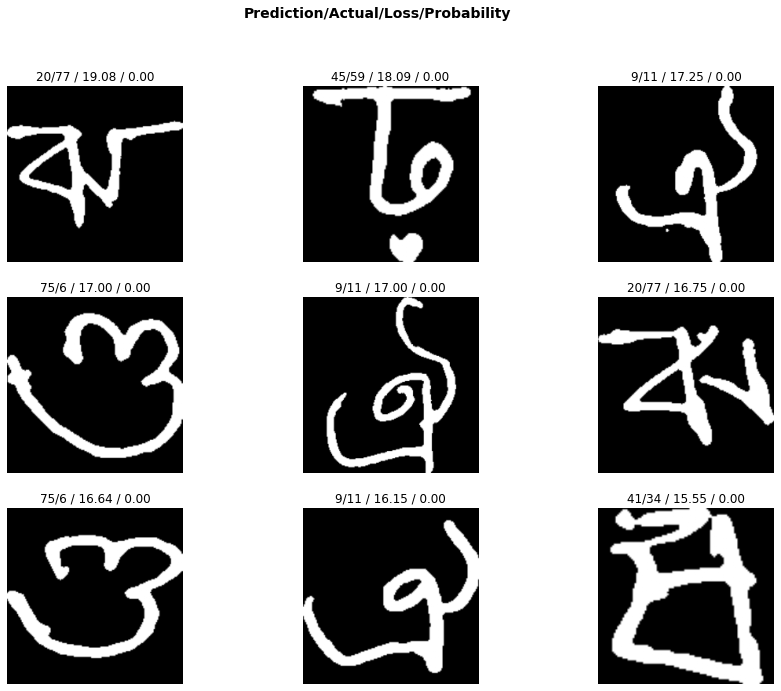

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
interp.most_confused(min_val=2)

[('72', '61', 109),
 ('71', '80', 40),
 ('31', '26', 34),
 ('65', '64', 30),
 ('27', '54', 29),
 ('35', '24', 29),
 ('43', '53', 26),
 ('75', '10', 26),
 ('80', '71', 24),
 ('64', '65', 21),
 ('25', '17', 19),
 ('45', '25', 18),
 ('13', '15', 15),
 ('26', '31', 15),
 ('24', '57', 14),
 ('28', '37', 14),
 ('24', '56', 13),
 ('61', '72', 12),
 ('71', '83', 12),
 ('77', '28', 12),
 ('16', '35', 11),
 ('30', '23', 11),
 ('37', '28', 11),
 ('42', '15', 11),
 ('6', '5', 11),
 ('72', '83', 11),
 ('56', '24', 10),
 ('15', '37', 9),
 ('24', '35', 9),
 ('42', '36', 9),
 ('1', '2', 8),
 ('13', '28', 8),
 ('36', '37', 8),
 ('36', '42', 8),
 ('4', '63', 8),
 ('28', '13', 7),
 ('3', '4', 7),
 ('35', '16', 7),
 ('65', '66', 7),
 ('84', '78', 7),
 ('11', '9', 6),
 ('15', '13', 6),
 ('15', '36', 6),
 ('33', '37', 6),
 ('37', '15', 6),
 ('5', '6', 6),
 ('84', '23', 6),
 ('84', '60', 6),
 ('13', '77', 5),
 ('15', '42', 5),
 ('17', '25', 5),
 ('17', '34', 5),
 ('2', '1', 5),
 ('32', '14', 5),
 ('32', '58'

# Prediction

In [29]:
img = open_image('index.png')

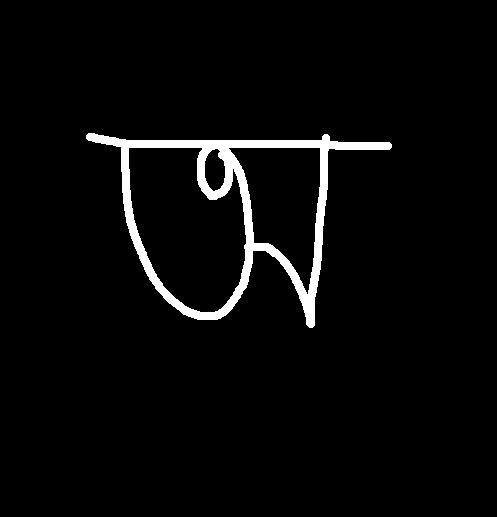

In [30]:
img

In [31]:
pred_class, pred_idx, outputs = learn.predict(img)

In [32]:
pred_class

Category 1

In [35]:
img = open_image('index1.png')

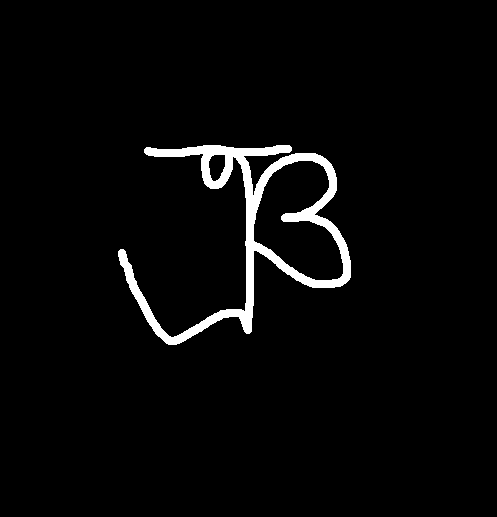

In [36]:
img

In [37]:
pred_class, pred_idx, outputs = learn.predict(img)

In [38]:
pred_class

Category 21

In [41]:
learn.freeze()

In [42]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


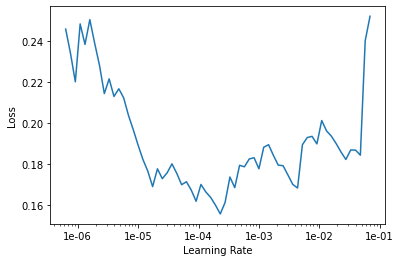

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(5, max_lr=slice(1e-5/2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.263466,0.213064,0.055357,0.944643,08:14
1,0.255256,0.212117,0.055326,0.944674,08:16
2,0.209238,0.210616,0.054875,0.945125,08:16
3,0.279310,0.212816,0.055778,0.944222,08:12
4,0.238779,0.212899,0.055357,0.944643,08:18
